# Portland Permit Data Analysis

In this notebook, I will conduct an introductory analysis of permit data from the city of Portland. This will involve assessing the dataset's shape, the first few rows of data, plotting the data spatially, and filtering the data to show permits pulled in a certain year, among other analysis steps. 

## Bring in the dataset

Our first step, as shown in the cell below, is to import the permit dataset.

In [105]:
import pandas as pd
permits = pd.read_csv('Residential_Building_Permits.csv')

## Conduct Data Exploration

Next, we're going to conduct some basic data exploration. 

### .Shape

In the cell below, we run the .shape command

In [106]:
permits.shape

(24000, 28)

So, we see that there are 28 columns to our data and 24,000 rows, or entries.

### .Info

In the cell below, we run the .info command

In [107]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           23999 non-null  float64
 1   Y           23999 non-null  float64
 2   OBJECTID    24000 non-null  int64  
 3   INDATE      23797 non-null  object 
 4   ISSUEDATE   24000 non-null  object 
 5   STATUS      24000 non-null  object 
 6   YEAR_       24000 non-null  int64  
 7   NEWCLASS    24000 non-null  object 
 8   NEWTYPE     24000 non-null  object 
 9   NBRHOOD     23748 non-null  object 
 10  PDXBND      24000 non-null  object 
 11  IS_ADU      24000 non-null  bool   
 12  REV         2 non-null      object 
 13  FOLDERNUMB  24000 non-null  object 
 14  PROP_ADDRE  23999 non-null  object 
 15  WORKDESC    24000 non-null  object 
 16  SUB         24000 non-null  object 
 17  OCC         23217 non-null  object 
 18  NEW_UNITS   24000 non-null  int64  
 19  FOLDER_DES  24000 non-nul

This shows us what each of our 28 columns describes. It also shows us the number of non-null attributes and the data type for each column. 

### .head()

In the cell below, we run the .head() command

In [108]:
permits.head()

,X,Y,OBJECTID,INDATE,ISSUEDATE,STATUS,YEAR_,NEWCLASS,NEWTYPE,NBRHOOD,...,NEW_UNITS,FOLDER_DES,VALUATION,CONST,PROPLOT,PROPGISID1,PROPERTYRO,FOLDERRSN,X_COORD,Y_COORD
0,-13654896.86,5714744.994,1,1995/03/30 00:00:00+00,1996/01/30 00:00:00+00,Final,1996,Alteration,Single Family Dwelling,EAST COLUMBIA,...,1,set up mh in space 9,0.0,VN,M355359,1N1E10AA 3400,1N1E10AA 03400,302175,7648165.407,708289.1668
1,-13656652.70,5694979.133,2,1994/08/01 00:00:00+00,1995/01/17 00:00:00+00,Final,1995,New Construction,Single Family Dwelling,SOUTH BURLINGAME,...,1,"NSFR GAR, CARSON HTS LOT 6 BLK 37, MAP #3829-z...",85978.0,VN,R128118,1S1E22CC 901,1S1E22CC 00901,267974,7642905.428,663059.3478
2,-13656652.70,5694979.133,3,1994/08/01 00:00:00+00,1995/01/17 00:00:00+00,Final,1995,New Construction,Single Family Dwelling,SOUTH BURLINGAME,...,1,"NSFR GAR, CARSON HTS LOT 5 BLK 37 MAP #3829-zo...",91733.0,VN,R128117,1S1E22CC 900,1S1E22CC 00900,267981,7642905.428,663059.3478
3,-13666371.38,5706691.907,4,1995/07/10 00:00:00+00,1995/08/15 00:00:00+00,Final,1995,New Construction,Single Family Dwelling,NORTHWEST HEIGHTS,...,1,NSFR - LOT 54 - SKYLINE SUMMIT #3 MAP 2820,183375.0,VN,R270853,1N1W26DA 6100,1N1W26DA 06100,318479,7621269.515,690553.2377
4,-13682711.86,5731453.220,5,1994/12/15 00:00:00+00,1995/01/06 00:00:00+00,Final,1995,New Construction,Single Family Dwelling,NaN,...,1,MANUFACTURED HOME TAX LOT 11 SECTION 34 3N2W ...,4000.0,VN,R326301,3N2W34D 800,3N2W34D 00800,287203,7585368.658,748346.0066


Here we see the first five rows of the data. This is laid out much more cleanly than the .info command.

### .valuecounts() 

In the cell below, we run the .valuecounts() command on the neighborhoods column of the dataset.

In [109]:
neighborhoods = permits.NBRHOOD
neighborhoods = neighborhoods.value_counts()
neighborhoods

POWELLHURST-GILBERT             2150
NORTHWEST HEIGHTS               1438
PLEASANT VALLEY                 1170
BRENTWOOD-DARLINGTON            1007
LENTS                            933
                                ... 
ARGAY/WILKES COMMUNITY GROUP       1
MC UNCLAIMED #11                   1
ALAMEDA/BEAUMONT-WILSHIRE          1
WOODLAND PARK                      1
MC UNCLAIMED #5                    1
Name: NBRHOOD, Length: 114, dtype: int64

This command shows us that permits were pulled in 114 Portland neighborhoods, with the most being pulled in the Powellhurst-Gilbert neighborhoods. This neighborhood is in the far southeast corner of the city limits. 

### .plot()

In the cell below, we run the .plot() command on the neighborhoods column of the dataset.

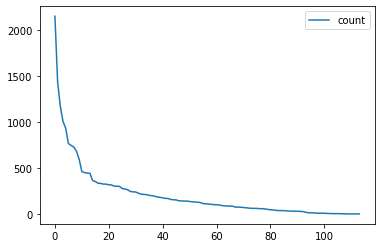

In [110]:
neighborhoods = neighborhoods.reset_index()
neighborhoods.columns.to_list()
neighborhoods.columns = ['neighborhood','count']
neighborhoods.plot()

The plot shows us the number of permits pulled in each neighborhood. As we can see, just a few neighborhoods (about 15) have seen much larger numbers of permits pulled than the rest of the neighborhoods. 

### Filter

In the cell below, we filter the data to see only the permit pulled in the Laurelhurst neighborhood (one of the wealthiest neighborhood in the city). 

In [111]:
Laurelhurst = permits[permits.NBRHOOD == 'LAURELHURST']
Laurelhurst

,X,Y,OBJECTID,INDATE,ISSUEDATE,STATUS,YEAR_,NEWCLASS,NEWTYPE,NBRHOOD,...,NEW_UNITS,FOLDER_DES,VALUATION,CONST,PROPLOT,PROPGISID1,PROPERTYRO,FOLDERRSN,X_COORD,Y_COORD
5002,-13650594.20,5704711.652,5003,1998/07/02 00:00:00+00,1998/11/18 00:00:00+00,Final,1998,Alteration,Accessory Dwelling Unit,LAURELHURST,...,1,ADU: CONVERT DETACHED GARAGE TO ADU,18380.0,VN,R203515,1N1E36DA 19900,1N1E36DA 19900,474140,7657451.370,685024.2599
5187,-13649816.60,5704302.750,5188,1998/09/22 00:00:00+00,1998/11/12 00:00:00+00,Final,1998,New Construction,Accessory Dwelling Unit,LAURELHURST,...,1,"ADU, DETACHED STRUCTURE.",26627.0,VN,R204217,1N2E31CB 14900,1N2E31CB 14900,488464,7659216.363,684039.2638
6235,-13651280.88,5704381.856,6236,1998/09/30 00:00:00+00,1999/05/11 00:00:00+00,Final,1999,New Construction,Rowhouse,LAURELHURST,...,1,"BUILD ROW HOUSE, LOT 2.",132835.0,VN,,,,490055,7655851.069,684309.3876
6328,-13651282.41,5704354.536,6329,1998/09/30 00:00:00+00,1999/05/11 00:00:00+00,Final,1999,New Construction,Rowhouse,LAURELHURST,...,1,"BUILD ROW HOUSE, LOT 1.",123483.0,VN,R240535,1N1E36CA 18102,1N1E36CA 18102,490054,7655845.892,684246.8119
7082,-13650215.08,5704138.811,7083,2000/04/17 00:00:00+00,2000/09/11 00:00:00+00,Under Inspection,2000,New Construction,Single Family Dwelling,LAURELHURST,...,1,J Eldredge - 12/31/01- One time extension of t...,243875.0,V-N,R204110,1N1E36DD 1700,1N1E36DD 01700,2029292,7658289.367,683687.2652
8212,-13650062.84,5705111.922,8213,2001/02/23 00:00:00+00,2001/02/23 00:00:00+00,Final,2001,Alteration,Accessory Dwelling Unit,LAURELHURST,...,1,"LEGALIZE ADU, WORK IS COMPLETED. NEW BATH, KI...",10000.0,V-N,R203376,1N1E36AD 4400,1N1E36AD 04400,2089748,7658698.365,685910.2565
9646,-13650384.89,5705324.652,9647,2002/04/22 00:00:00+00,2002/06/14 00:00:00+00,Final,2002,Addition,Accessory Dwelling Unit,LAURELHURST,...,1,demo existing attached garage and construct ne...,100000.0,V-N,R202587,1N1E36AD 17000,1N1E36AD 17000,2229048,7657970.057,686417.6724
13072,-13651100.40,5704840.103,13073,2004/04/29 00:00:00+00,2004/04/29 00:00:00+00,Final,2004,Addition,Single Family Dwelling,LAURELHURST,...,1,ENLARGE EXISTING DORMER - ADD ONE CKT AND ONE ...,8000.0,V-N,R202674,1N1E36AC 15100,1N1E36AC 15100,2357625,7656294.152,685349.5916
13115,-13651266.14,5703798.408,13116,2004/05/14 00:00:00+00,2004/07/09 00:00:00+00,Final,2004,New Construction,Accessory Dwelling Unit,LAURELHURST,...,1,ADU W/ NON-HABITABLE BASEMENT / COMPLEX / PATH...,79519.0,V-N,R203884,1N1E36CD 2400,1N1E36CD 02400,2360582,7655849.674,682970.0622
13335,-13650299.63,5704408.880,13336,2004/07/29 00:00:00+00,2004/08/23 00:00:00+00,Final,2004,Alteration,Single Family Dwelling,LAURELHURST,...,1,GARAGE CONVERSION TO ADU,25000.0,V-N,R204162,1N1E36DA 7700,1N1E36DA 07700,2376726,7658111.050,684311.9047


We see that 34 permits were pulled in this neighborhood.

### Laurelhurst Permit Types

As an extra step of analysis, I'm curious to see what type of permits were pulled in Laurelhurst. Was it mostly single family homes (the predominant housing type in the area)? Or were there many ADUs and/or multifamily developments?

,type,count
0,Single Family Dwelling,19
1,Accessory Dwelling Unit,12
2,Rowhouse,2
3,Apartments/Condos,1


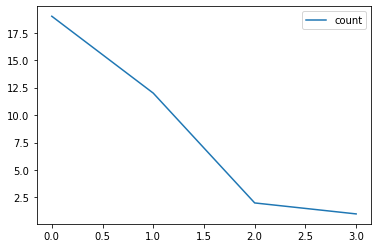

In [112]:
Laurelhurst_Units = Laurelhurst.NEWTYPE
Laurelhurst_Units = Laurelhurst_Units.value_counts()
Laurelhurst_Units = Laurelhurst_Units.reset_index()
Laurelhurst_Units.columns.to_list()
Laurelhurst_Units.columns = ['type','count']
Laurelhurst_Units.plot()
Laurelhurst_Units

From both the table and the plot we can see that there are quite a few single family dwelling units but also plenty of ADUs. There are also two rowhouses and one apartment.